# 1. Load and Explore



## 1.1 Load the data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#df = pd.read_csv('insurance.csv') #load the csv dataset into a 'dataframe' df

#You can mount the file on your google drive and load it. To make life easier, just make sure your directory name doesn't have 'spaces'
#Example    /Dataset/machine learning and others/  <<<This directory has spaces. NOT GOOD
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv') #load the csv dataset into a 'dataframe' df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Visualize the feature of interest against the target variable

<Axes: xlabel='age', ylabel='charges'>

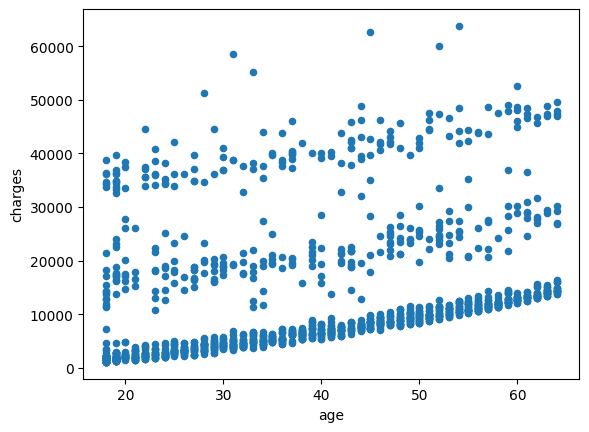

In [42]:
df.plot.scatter('age','charges')



## 1.2 Explore the data

In [15]:
df.head()
#df.head(5) #this shows the TOP 5 rows/records/samples/observations of the dataset
#df.tail(5) #this shows the BOTTOM 5 rows/records/samples/observations of the dataset
#df.sample(3) #df.sample sample randomly from the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df.info()
# --Checklist--
#Q1 How many rows and columns does the dataset have?
#Q2 Which are the feature(independant variable(s)) columns, and which is/are the target output (dependant variable(s))?
#Q3 Is the target output suitable for a regression or a classification problem?
#Q4 For each of the variables, what is the datatypes?
#Q5 Which variable is non-informative  or "useless"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#2. Selecting columns

* Sometimes you just want to select a certain column or columns

In [33]:
df_sex_column = df[['bmi']]
df_sex_column.head()

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880


* You can select multiple columns like this


In [34]:

df_sub_columns  = df[['sex','age','smoker','charges']]
df_sub_columns.info()
df_sub_columns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1338 non-null   object 
 1   age      1338 non-null   int64  
 2   smoker   1338 non-null   object 
 3   charges  1338 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.9+ KB


,sex,age,smoker,charges
0,female,19,yes,16884.92400
1,male,18,no,1725.55230
2,male,28,no,4449.46200
3,male,33,no,21984.47061
4,male,32,no,3866.85520


## 1.3 Condition based on rows

BMI vs insurance charges among those who smoke. We select people who smoke, their BMI and the amount of insurance charges that they have to pay. And then we visualize it. As we can see below, the higher the BMI (the more obese a smoker person is), the more expensive the amount of insurance charges. This is logical and fits our intuition/hypothesis.


* Let's take a look at just one variable.

* Let's choose the rows of data of people who smoke.


# 3. Select rows (impose conditions on them)

## 3.1 Rows with categorical values

* Can only use == operator ('=' is not the same as '==')

In [36]:
df_smoker = df[df['smoker']=='yes'] #select the row you want to impose the condition. Then impose the condition using operators =='yes'
df_smoker.info()
df_smoker.tail(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


,age,sex,bmi,children,smoker,region,charges
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630
1337,61,female,29.070,0,yes,northwest,29141.36030


<Axes: xlabel='bmi', ylabel='charges'>

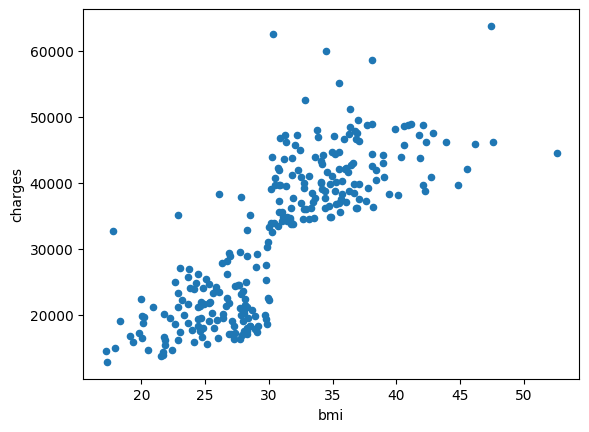

In [18]:
df_smoker.plot.scatter(x='bmi',y='charges')

In [22]:
df_female= df[df['sex']=='female']
df_female.info()
df_female.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       662 non-null    int64  
 1   sex       662 non-null    object 
 2   bmi       662 non-null    float64
 3   children  662 non-null    int64  
 4   smoker    662 non-null    object 
 5   region    662 non-null    object 
 6   charges   662 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 41.4+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


## 3.2 Rows with continuous values

* Can use the >,<,>=,<=,== operators
* For multiple conditions can use df.query() or df.loc()

In [30]:
df_bmi_less27 = df[df['bmi'] < 27] #Select data of those who have bmi less than 27
df_bmi_less27.info()
df_bmi_less27.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 3 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       384 non-null    int64  
 1   sex       384 non-null    object 
 2   bmi       384 non-null    float64
 3   children  384 non-null    int64  
 4   smoker    384 non-null    object 
 5   region    384 non-null    object 
 6   charges   384 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 24.0+ KB


,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
5,31,female,25.740,0,no,southeast,3756.62160
9,60,female,25.840,0,no,northwest,28923.13692
10,25,male,26.220,0,no,northeast,2721.32080
11,62,female,26.290,0,yes,southeast,27808.72510
